# Tutorial 2: MORBs

In this tutorial, we will generate the data and plot Figure 2a-d
of M$^\text{c}$Nab and Ball, (2022), Volcanica (in submission).

## Importing libraries

Let's start by importing some libraries. If you have installed meltPT correctly, this should work!

In [1]:
from meltPT import *
import pyMelt as m
import matplotlib.pyplot as plt

## Create Data for Figure 2a

### Reading data and save to new csv

First, we will read in a geochemical mid ocean ridge basalt (MORB) database from Gale et al., (2013), G3 14:3  (Gale_2013_MOR_Sample_Data.csv). This database does not include H2O estimates and we only want samples with recorded Ce concentrations (that we can convert into H2O estimates). We also filter the database to remove samples that are close to the Iceland hotspot (e.g., latitute $= 60 \pm 5$). We then save this filtered database as ridge_in.csv

In [2]:
df = pd.read_csv("../Data/Gale_2013_MOR_Sample_Data.csv", sep=',')
df = df.loc[df['Ce']>0.]
df = df.loc[(df['Latitude']>70.) | (df['Latitude']<60.)]
df.to_csv("../Data/ridge_in.csv", sep=',')

### Initialising the Suite object

Read in ridge_in.csv. Here we also choose important variables for later analysis. min_SiO2 and min_MgO set lower limits for acceptable SiO2 and MgO concentrations, respectively. Using min_MgO = 8.5 wt% ensures that samples have predominantly experienced olivine fractionation. min_SiO2 = 40 wt% ensures suitable samples for use with the Plank & Forsyth (2016) thermobarometer. src_FeIII_totFe sets the Fe$^{3+}$/$\Sigma$Fe ratio of the melt and we take the value of 0.14 from Zhang et al., (2018, Chemical Geology, 479). src_Fo sets the target Fo# for composition backtracking. Ce_to_H2O sets how we estimate H$_{2}$O from Ce concentrations and we use the value of 200 from Yang et al., (2021), Nature Communications, 12.

In [3]:
s = Suite("../Data/ridge_in.csv", src_FeIII_totFe=0.14, src_Fo=0.9, Ce_to_H2O=200., min_MgO=8.5)

/home/mcnab/Melting/meltPT/meltPT/parse.py:77: UserWarning: Input csv does not contain a Fe2O3 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:77: UserWarning: Input csv does not contain a Cr2O3 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:77: UserWarning: Input csv does not contain a NiO column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:77: UserWarning: Input csv does not contain a CoO column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:77: UserWarning: Input csv does not contain a CO2 column: we will try to fill it for you, or set it to zero.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/parse.py:77: UserWarning: Input csv does not contain a FeO_tot column: we wil

### Backtrack Compositions, Calculate PT and save to Ridge_output.csv

See Tutorial 1 for complete explanation of these steps. The output includes a estimate of pressure and temperature for every eligible MORB sample for plotting in Figure 2a. The min_SiO2 flag rejects all samples with SiO$_{2}$ < 40 wt%. This value is chosen since the Plank and Forsyth thermobarometer is only calibrated for samples with SiO$_{2}$ > 40 wt%.

In [4]:
b = BacktrackOlivineFractionation()
s.backtrack_compositions(backtracker=b)
s.compute_pressure_temperature(min_SiO2=40.)

/home/mcnab/Melting/meltPT/meltPT/backtrack_compositions.py:221: UserWarning: ALV2883-1250: backtracking failed! Starting Fo above mantle Fo.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/backtrack_compositions.py:221: UserWarning: END0026-006-001: backtracking failed! Starting Fo above mantle Fo.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/backtrack_compositions.py:221: UserWarning: END0063-001-006: backtracking failed! Starting Fo above mantle Fo.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/backtrack_compositions.py:221: UserWarning: KNO0042-146-107: backtracking failed! Starting Fo above mantle Fo.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/backtrack_compositions.py:221: UserWarning: KNO0042-011-203: backtracking failed! Starting Fo above mantle Fo.
  warnings.warn(message)
/home/mcnab/Melting/meltPT/meltPT/backtrack_compositions.py:221: UserWarning: KNO0042-024-009: backtracking failed! Starting Fo above mantle Fo.
  warnin

## Create Data for Figures 2b-d

To make Figures 2b-d we need to estimate $T_{p}$ for each ridge in turn and then compare the results to geochemical and bathymetric data averaged across each ridge segment.

### Read in ridge segment data

Input ridge segment data from Gale et al (2014), Journal of Petrology 55:6 1051-1082. The database includes each ridge segment location, an estimate of primary composition (e.g., Na90) and ridge depth (Gale_2014_MOR_Segment_Data.csv)

In [5]:
seg_data = pd.read_csv('../Data/Gale_2014_MOR_Segment_Data.csv', sep=',')

/home/mcnab/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Set up output pandas dataframe for writing results

In [6]:
df_out = pd.DataFrame(columns = ['Ridge', 'Longitude', 'Latitude', 'N_Samples', 'Tp', 'upper_Tp', 'lower_Tp'])

### Set up mantle composition

see Tutorial 1 for explanation

In [7]:
lz = m.lithologies.katz.lherzolite()
mantle = m.mantle([lz], [1], ['Lz'])
P_sol = np.arange(0., 5., 0.1)
T_sol = [lz.TSolidus(P) for P in P_sol]

### Find Tp of each ridge segment

Here we take each ridge segment in turn and use any available data to estimate potential temperature for that ridge segment. We then find the Na90 and ridge depth data and print Tp, Na90 and Ridge Depth to the output file. See Tutorial 1 for detailed explanation of Tp estimation procedure. This step may take several minutes depending on your computer.

In [8]:
# Make array of all ridge segment names
ridges = df['Province'].unique()

for i in range(0, (len(ridges) - 1), 1):
  
    # print each ridge segment to own csv file
    ridge_df = df.loc[(df['Province'] == ridges[i])]
    ridge_df.to_csv('../Data/ridge.csv', index=False)

    # Parse ridge segment data to s and filter for key criteria
    s2 = Suite("../Data/ridge.csv", Ce_to_H2O=200., src_FeIII_totFe=0.14, min_MgO=8.5)
    
    # Make sure ridge segment >5 data points
    if len(s2.data['Province']) > 5:

        # Find pressure and temperature of each sample
        b = BacktrackOlivineFractionation()
        s2.backtrack_compositions(backtracker=b)
        s2.compute_pressure_temperature(min_SiO2=40.)  

        # make sure ridge has >5 Tp estimates
        if len(s2.PT['T']) > 5:

            # Fit Tp to suite
            s2.find_suite_potential_temperature(mantle, find_bounds=True)
            print("Best-fitting melting model for Ridge",ridges[i],": Tp = %i oC." 
                  % (s2.potential_temperature))
            
            # Find Na90 and Ridge Depth data and errors
            # If no data available add 0
            seg = seg_data[seg_data['seg name'] == s2.data['Province'].iloc[0]]
            if seg.empty:
                Na90 = np.nan
                R_Depth = np.nan
                R_Depth_Err = np.nan
            else:
                Na90 = float(seg['Na90'].to_numpy()[0])
                R_Depth = float(seg['mean depth'].to_numpy()[0])
                R_Depth_Err = float(seg['minmax depth'].to_numpy()[0])
            
            
            # ---- Output ridge segment data to df_out            
            dict_result = {'Ridge' : [s2.data['Province'].iloc[0]],
                            'Longitude' : [s2.data['Longitude'].mean()],
                            'Latitude' : [s2.data['Latitude'].mean()],
                            'N_Samples' : [len(s2.data['Latitude'])],
                            'Tp' : [s2.potential_temperature],
                            'upper_Tp' : [s2.upper_potential_temperature],
                            'lower_Tp' : [s2.lower_potential_temperature],
                            'Na90' : [Na90],
                            'R_Depth' : [R_Depth],
                            'R_Depth_Err' : [R_Depth_Err]}
            
            # ---- save output dictionary to pandas dataframe
            df_result = pd.DataFrame.from_dict(dict_result)
            
            # ---- add df_result as new row in df_out
            df_out = pd.concat([df_out, df_result], ignore_index = True)

Best-fitting melting model for Ridge EPRR29 : Tp = 1419 oC.
Best-fitting melting model for Ridge GAKK10 : Tp = 1408 oC.
Best-fitting melting model for Ridge GAKK15 : Tp = 1417 oC.
Best-fitting melting model for Ridge GAKK7 : Tp = 1321 oC.
Best-fitting melting model for Ridge GALA9 : Tp = 1537 oC.
Best-fitting melting model for Ridge JUAN15 : Tp = 1418 oC.
Best-fitting melting model for Ridge MARR116 : Tp = 1414 oC.
Best-fitting melting model for Ridge MARR232 : Tp = 1509 oC.
Best-fitting melting model for Ridge MARR236 : Tp = 1537 oC.
Best-fitting melting model for Ridge MARR240 : Tp = 1485 oC.
Best-fitting melting model for Ridge MARR247 : Tp = 1469 oC.
Best-fitting melting model for Ridge MARR46 : Tp = 1568 oC.
Best-fitting melting model for Ridge MARR88 : Tp = 1402 oC.
Best-fitting melting model for Ridge MARR89 : Tp = 1427 oC.
Best-fitting melting model for Ridge MARR95 : Tp = 1414 oC.


Note that several samples return the warning "backtracking failed! Starting Fo above mantle Fo". These samples begin with Fo numbers greater than the target value and so are rejected. The program continues after excising these samples. 

## Plot Figure 2

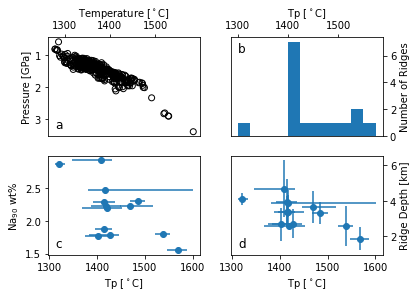

In [9]:
# ---------------------
# ---- Create Figure 2a of McNab & Ball (2022)
# ---------------------

# Make a multi-panelled figure (2x2)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2)

# Plot temperature vs pressure results
ax1.scatter(s.PT['T'], s.PT['P'], marker="o", facecolors='none', 
            edgecolors='k', label="Sample")

# Organise and label axes
ax1.set_xlabel(r"Temperature [$^\circ$C]")
ax1.set_ylabel("Pressure [GPa]")
ax1.text(0.05, 0.05, 'a', verticalalignment='bottom', 
         horizontalalignment='left', transform=ax1.transAxes, fontsize=12)
ax1.invert_yaxis()
ax1.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax1.xaxis.set_label_position('top')

# ---------------------
# ---- Plot Figure 2b - A histogram of Tp results
# ---------------------

# Assign bins for histogram
bin_array=[1300,1325,1350,1375,1400,1425,1450,1475,1500,1525,1550,1575]

# Plot histogram of Tp
ax2.hist(df_out['Tp'], bins=bin_array, histtype='bar', align='mid', orientation='vertical')

# Organise axes
ax2.set_xlabel(r"Tp [$^\circ$C]")
ax2.set_ylabel("Number of Ridges")
ax2.text(0.05, 0.95, 'b', verticalalignment='top', 
          horizontalalignment='left', transform=ax2.transAxes, fontsize=12)
ax2.xaxis.set_label_position('top')
ax2.xaxis.set_tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_tick_params(right=True, labelright=True, left=False, labelleft=False)

# ---------------------
# ---- Create Figure 2c - Na90 as function of Tp
# ---------------------

# Plot data
ax3.errorbar(df_out['Tp'], df_out['Na90'], xerr=(df_out['Tp']-df_out['lower_Tp'], df_out['upper_Tp']-df_out['Tp']), fmt="o")

# Organise axes
ax3.set_xlabel(r"Tp [$^\circ$C]")
ax3.set_ylabel("Na$_{90}$ wt%")
ax3.text(0.05, 0.05, 'c', verticalalignment='bottom', 
          horizontalalignment='left', transform=ax3.transAxes, fontsize=12)

# ---------------------
# ---- Create Figure 2d - Ridge Depth as function of Tp
# ---------------------

# Plot data
ax4.errorbar(df_out['Tp'], df_out['R_Depth']/-1000., xerr=(df_out['Tp']-df_out['lower_Tp'], df_out['upper_Tp']-df_out['Tp']), yerr=df_out['R_Depth_Err']/1000., fmt="o")

# Organise axes
ax4.set_xlabel(r"Tp [$^\circ$C]")
ax4.set_ylabel("Ridge Depth [km]")
ax4.text(0.05, 0.05, 'd', verticalalignment='bottom', 
          horizontalalignment='left', transform=ax4.transAxes, fontsize=12)
ax4.yaxis.set_label_position('right')
ax4.yaxis.set_tick_params(right=True, labelright=True, left=False, labelleft=False)

# ---------------------
# Show Figure 2
# ---------------------
plt.show()

